Punk rock, with its raw energy and rebellious spirit, has left an indelible mark on the music world. But what if we could quantify that energy and rebellion? Let's dive into a dataset of 750 classic punk rock tracks and see what insights we can uncover. If you find this notebook useful, please upvote it.

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# Load the dataset
file_path = '/content/ClassicPunkRock.csv'
df = pd.read_csv(file_path)

## Initial Exploration

In [6]:
# Display the first few rows of the dataset
df.head()

,Track,Artist,Album,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity
0,Moonwok,99zed,TALEZ FROM THA STANK,1980,133754,4,0.776,0.609,1,-4.674,1,0.1450,0.181000,0.000394,0.187,0.218,155.914,60
1,NUISANCE,99zed,NUISANCE,1980,124458,4,0.733,0.582,8,-4.450,1,0.2330,0.000032,0.000000,0.185,0.729,81.017,50
2,Antmusic - Remastered,Adam & The Ants,Kings of the Wild Frontier (Deluxe Edition),1980,216960,4,0.695,0.806,2,-4.119,1,0.1420,0.101000,0.000120,0.370,0.635,81.151,44
3,Cleopatra,Adam & The Ants,Dirk Wears White Sox (Remastered),1983,195160,4,0.600,0.787,9,-6.841,1,0.0266,0.170000,0.000825,0.164,0.679,93.064,14
4,Dog Eat Dog - Remastered,Adam & The Ants,Kings of the Wild Frontier (Deluxe Edition),1980,190186,4,0.624,0.854,0,-4.833,1,0.0421,0.013000,0.000616,0.331,0.751,103.892,37


## Data Cleaning and Preparation

In [7]:
# Check for missing values
df.isnull().sum()

,0
Track,0
Artist,0
Album,0
Year,0
Duration,0
Time_Signature,0
Danceability,0
Energy,0
Key,0
Loudness,0


In [8]:
# Check data types
df.dtypes

,0
Track,object
Artist,object
Album,object
Year,int64
Duration,int64
Time_Signature,int64
Danceability,float64
Energy,float64
Key,int64
Loudness,float64


## Descriptive Statistics

In [9]:
# Summary statistics of the dataset
df.describe()

,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity
count,789.000000,7.890000e+02,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000
mean,1987.437262,1.907312e+05,3.953105,0.418485,0.842447,5.152091,-7.426228,0.752852,0.087960,0.062906,0.097101,0.248457,0.535043,131.797279,35.205323
std,10.114456,9.054807e+04,0.296479,0.144003,0.150377,3.598108,3.135475,0.431627,0.069167,0.138150,0.220242,0.195828,0.229118,32.264733,14.636750
min,1969.000000,3.100300e+04,1.000000,0.068400,0.112000,0.000000,-22.884000,0.000000,0.025900,0.000001,0.000000,0.017000,0.036800,64.410000,0.000000
25%,1980.000000,1.378400e+05,4.000000,0.314000,0.784000,2.000000,-9.299000,1.000000,0.046500,0.000726,0.000002,0.104000,0.367000,103.892000,26.000000
50%,1983.000000,1.810660e+05,4.000000,0.408000,0.892000,5.000000,-6.961000,1.000000,0.066100,0.006300,0.000449,0.187000,0.544000,130.787000,35.000000
75%,1994.000000,2.254260e+05,4.000000,0.510000,0.951000,9.000000,-4.918000,1.000000,0.107000,0.052100,0.032100,0.336000,0.720000,157.621000,45.000000
max,2023.000000,1.101773e+06,5.000000,0.937000,0.999000,11.000000,-1.389000,1.000000,0.944000,0.984000,0.976000,0.991000,0.977000,214.848000,83.000000


## Correlation Analysis

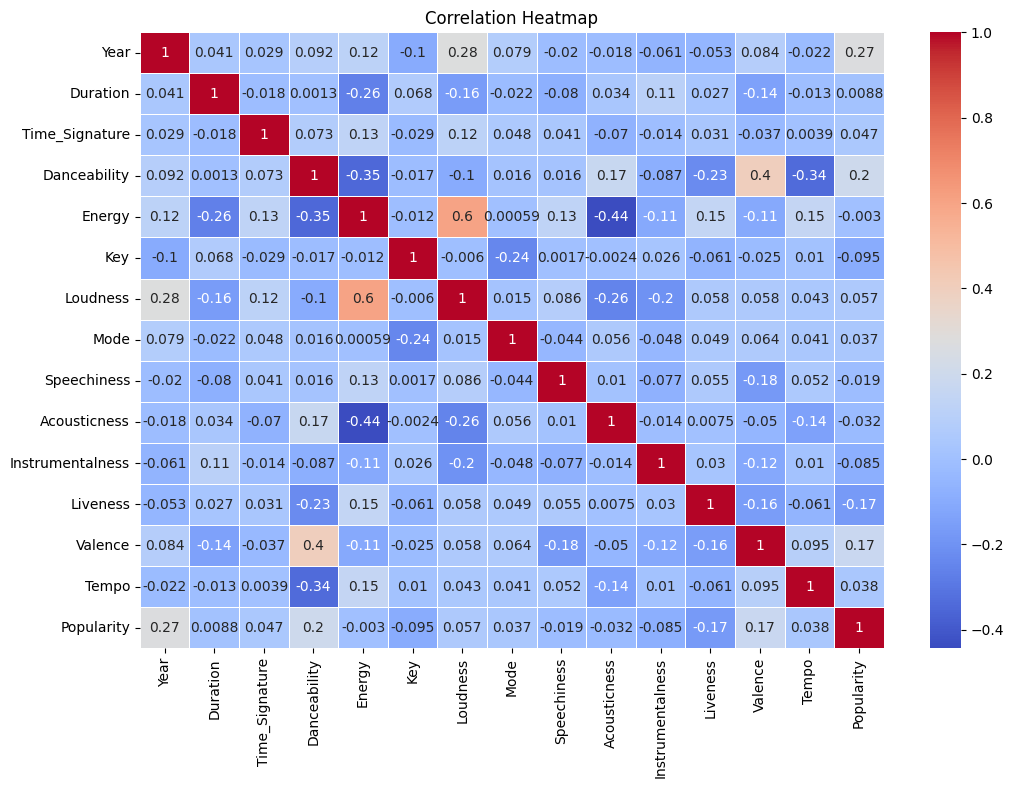

In [10]:
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Predicting Popularity

In [11]:
# Define features and target variable
X = numeric_df.drop(columns=['Popularity'])
y = numeric_df['Popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

(200.70786975756837, 0.10658248398990622)

## Visualization of Predictions

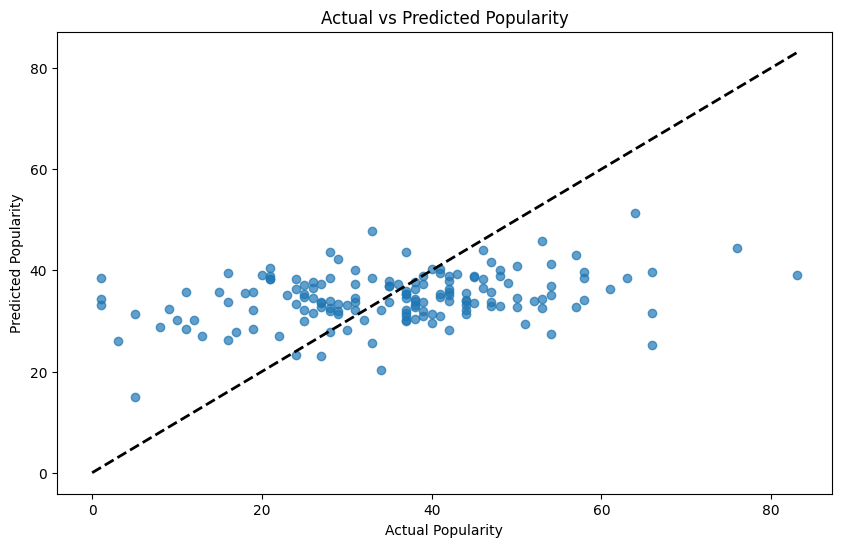

In [12]:
# Plot actual vs predicted popularity
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Actual vs Predicted Popularity')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()

## Future Analysis

What other insights could we derive from this dataset? Perhaps a deeper dive into the relationship between different audio features and their impact on popularity? Or maybe an analysis of how punk rock has evolved over the years? Let me know your thoughts.

## Credits
This notebook was created with the help of [Devra AI data science assistant](https://devra.ai/ref/kaggle)